# seaborn的绘图函数练习
* 处理一组数据时，首先要做的第一件事是了解变量是如何分布的

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

D:\softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


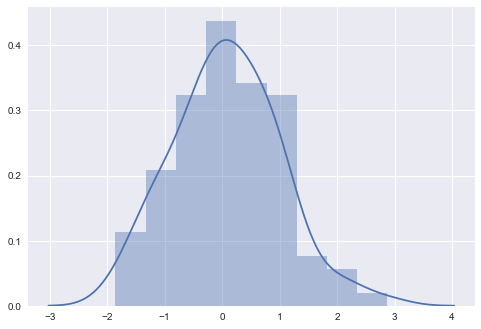

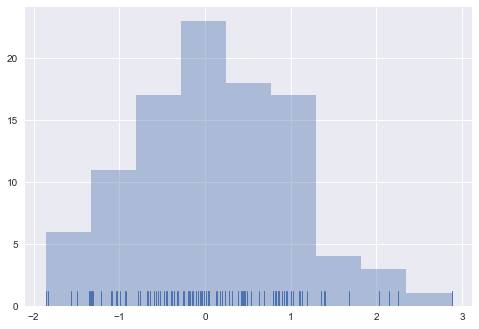

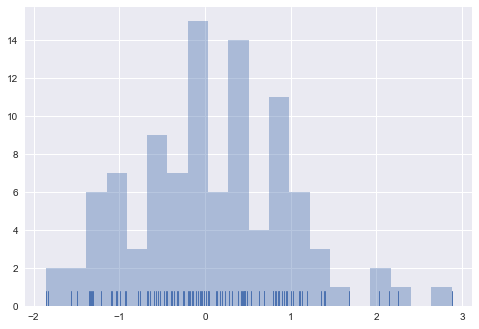

In [3]:
x = np.random.normal(size=100) # 单变量分布将绘制 直方图，并绘制 KDE （核心密度函数）
sns.distplot(x) # 分布绘制
plt.show()
sns.distplot(x, kde=False, rug=True) # 去除密度曲线并在每个观测点绘制一个小的垂直刻度
# 可以使用该rugplot()功能制作地毯本身，但它也可用于distplot()
plt.show()
sns.distplot(x, bins=20, kde=False, rug=True) # 一共可以分为20个段
plt.show()

### 核密度KDE的估计是对每个rug进行估计，然后把所有的KDE曲线加起来，之后进行归一化，得到所有的数据的平均KDE曲线

D:\softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


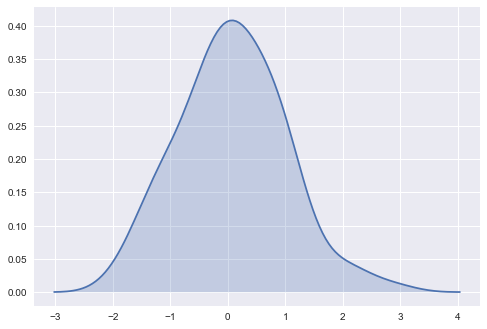

In [4]:
sns.kdeplot(x, shade=True) # KDE曲线绘制
plt.show()

* 还可以使用distplot()拟合参数分布到数据集，并直观地评估它与观察数据的对应关系

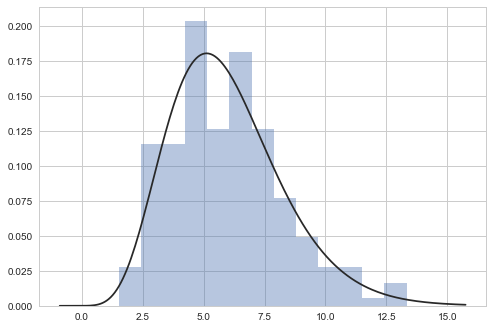

In [5]:
sns.set_style("whitegrid")
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)
plt.show()

            x         y
0    2.190873  2.902961
1    0.387901  3.441322
2   -1.304909  0.586173
3   -0.016867  0.907323
4    0.284953  1.189304
5   -0.050474  0.670980
6    0.722333  1.062931
7   -0.026326  1.294782
8   -0.788587  0.669541
9   -0.372764  1.731517
10   0.793945  0.844329
11  -1.587542 -0.325003
12   0.982330 -0.079164
13  -0.709190  0.617583
14  -0.320185  1.700419
15  -1.107602  1.969576
16  -0.152153  0.863231
17   0.672152 -0.337424
18  -0.054459  1.291490
19  -0.854301  0.461832
20  -1.467110  0.988230
21   0.769059  0.464059
22   0.864182  2.160841
23  -0.320895 -0.682581
24   0.201675  0.767145
25   0.910064  0.352476
26  -0.203879  2.281753
27  -1.968103  0.814249
28  -0.312965  1.835252
29  -1.017516  2.107019
..        ...       ...
170 -0.820467  2.150415
171  1.987218  2.863377
172  0.541367  1.672410
173 -0.230476  1.188198
174  0.654961  3.311254
175 -0.393180 -0.064882
176 -0.466270 -0.311687
177 -1.669818 -0.640678
178 -0.010700  1.530689
179 -0.726582  0

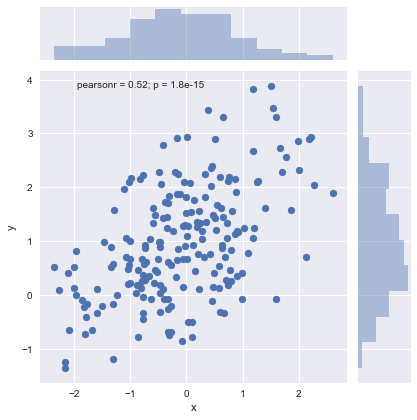

In [6]:
# 使双变量分布可视化的最熟悉的方法是散点图，其中每个观察点都以x和y值的点显示。这对于两个方面的rug是分不开的。
# 您可以使用matplotlib plt.scatter函数绘制一个散点图，它也是该jointplot()函数显示的默认类型：
sns.set()
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print(df)
sns.jointplot(x="x", y="y", data=df)
plt.show()

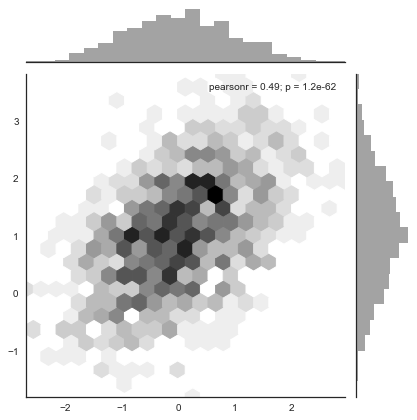

D:\softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


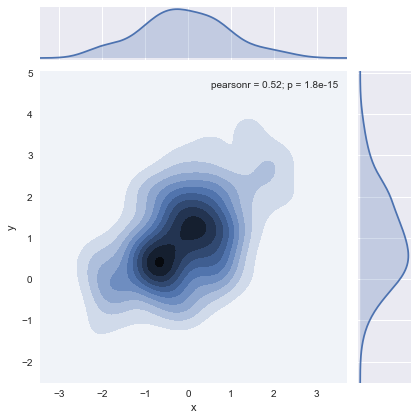

In [7]:
# The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts 
# of observations that fall within hexagonal bins. This plot works best with relatively large datasets. 
# It’s available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background:
# 直方图的二元绘制，在数据量大的时候更有效

x, y = np.random.multivariate_normal(mean, cov, 1000).T

with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")
plt.show()
sns.jointplot(x="x", y="y", data=df, kind="kde") # 高维的同样可以绘制 KDE
plt.show()

## 可视化数据集中的成对关系¶
* 要在数据集中绘制多个成对的双变量分布，可以使用该pairplot()函数。
* 这将创建一个轴矩阵并显示DataFrame中每对列的关系。默认情况下，它也绘制每个变量在对角轴上的单变量分布

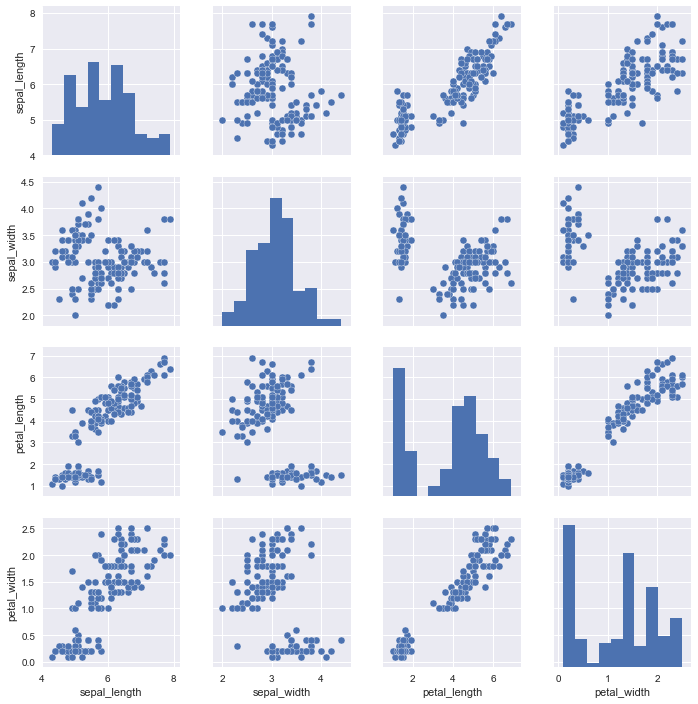

In [8]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)
plt.show()

## 用分类数据绘图

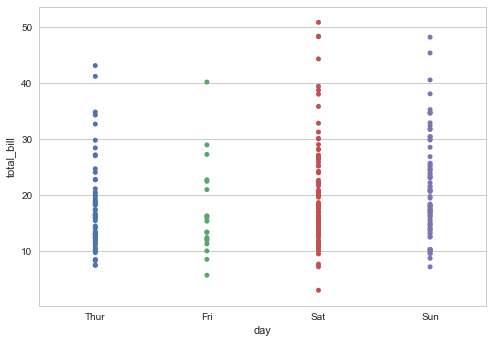

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
sns.stripplot(x="day", y="total_bill", data=tips) # 分类散点图
plt.show()

* 在一个条形图中，散点图通常会重叠。这使得很难看到数据的完整分布。一个简单的解决方案是使用一些随机的“抖动”来调整位置（仅沿分类轴）

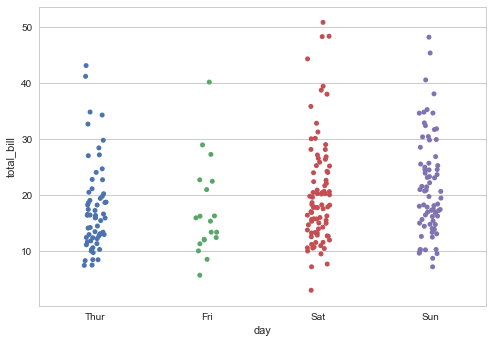

In [10]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.show()

* 一种不同的方法是使用函数swarmplot()，该函数将分类轴上的每个散点图点与避免重叠点的算法对齐

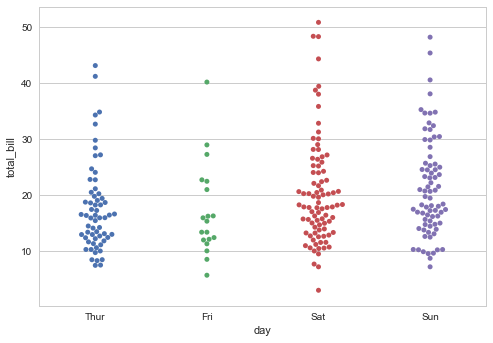

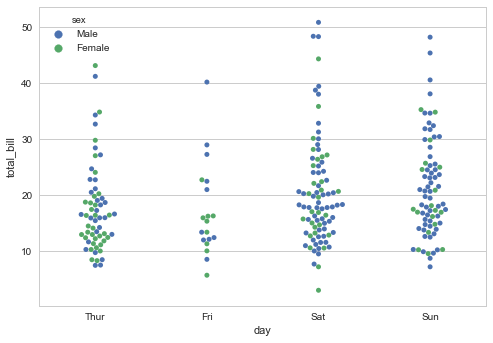

In [11]:
sns.swarmplot(x="day", y="total_bill", data=tips) # 尽量分散的方式绘制
plt.show()
# 添加一个新的分类变量
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips) # hue 参数新增一个分类变量
plt.show()

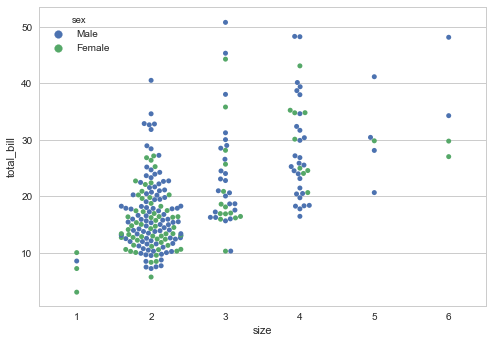

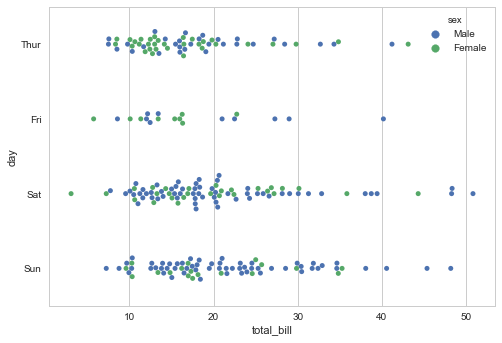

In [12]:
# In general, the seaborn categorical plotting functions try to infer the order of categories from the data.
# If your data have a pandas Categorical datatype, then the default order of the categories can be set there.
# For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame,
# but categories that look numerical will be sorted

sns.swarmplot(x="size", y="total_bill", hue="sex", data=tips)
plt.show()
# 可以调整方向
sns.swarmplot(y="day", x="total_bill", hue="sex", data=tips)
plt.show()

## 类别内观察变量的分布


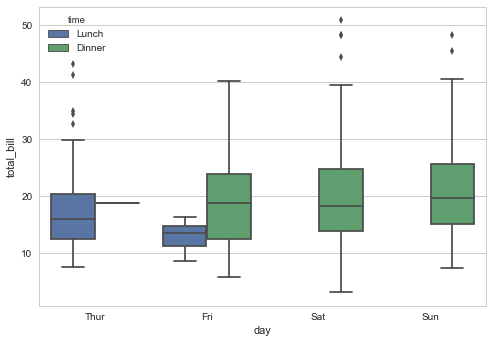

In [13]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips) # 箱线图
plt.show()

## Violinplots
* A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described

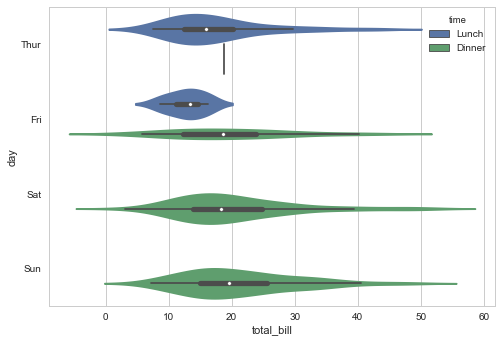

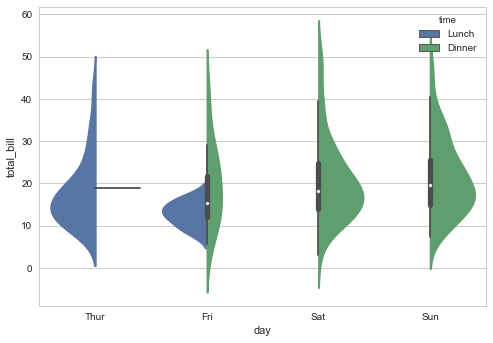

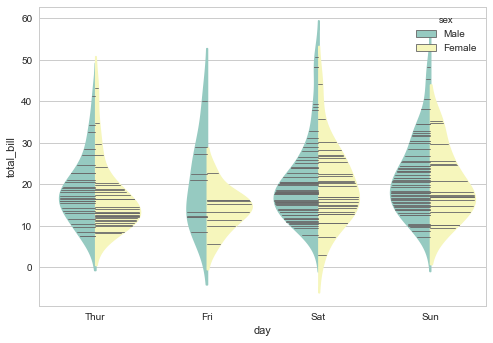

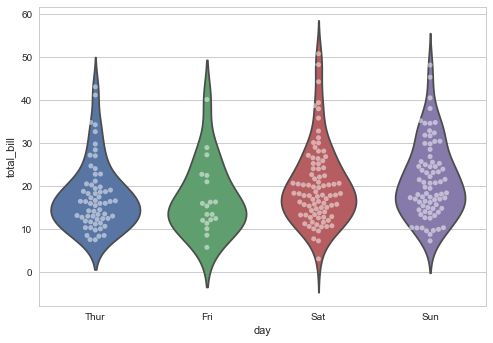

In [14]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)
plt.show()
sns.violinplot(y="total_bill", x="day", hue="time", data=tips,split=True)
plt.show()
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3") # 画直方图而不是箱线图
plt.show()
# 可以相互结合
sns.violinplot(x="day", y="total_bill", data=tips, inner=None) # 默认的inner 是箱线图
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)
plt.show()

## 类别内的统计估计

* A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:



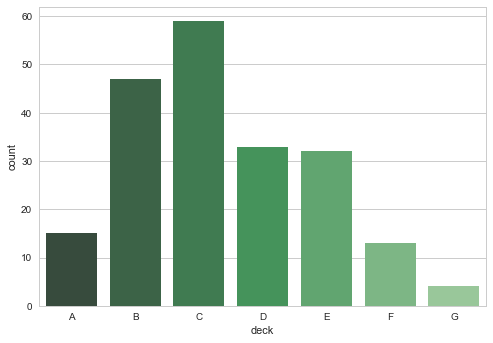

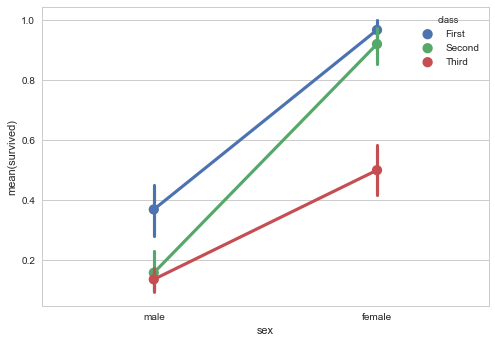

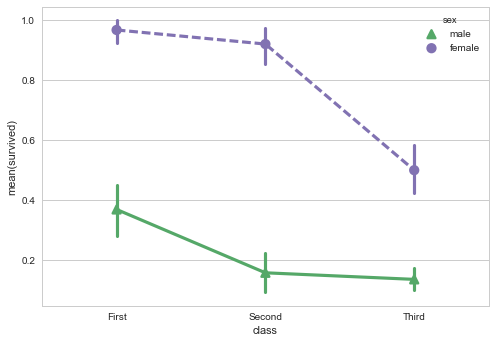

In [15]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")
plt.show()
sns.pointplot(x="sex", y="survived", hue="class", data=titanic) # 竖线表示 置信区间
plt.show()
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])
plt.show()

## 绘制“宽格式”数据

* 虽然使用“长格式”或“整洁”数据是优选的，但是这些功能也可以应用于各种格式的“宽格式”数据，
* 包括pandas DataFrame或二维numpy数组阵列。这些对象应该直接传递给数据参数

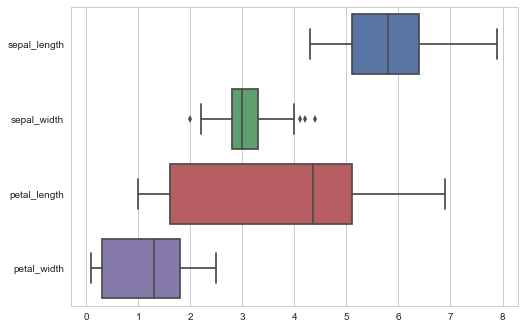

In [16]:
sns.boxplot(data=iris, orient="h")
plt.show()

## 绘制多层面板分类图

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


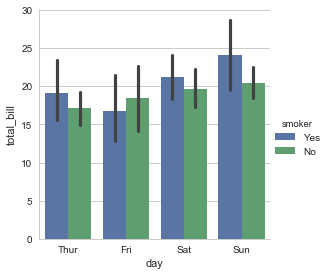

In [30]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar") # 带有误差线
tips = sns.load_dataset("tips")
print(tips.describe())
plt.show()

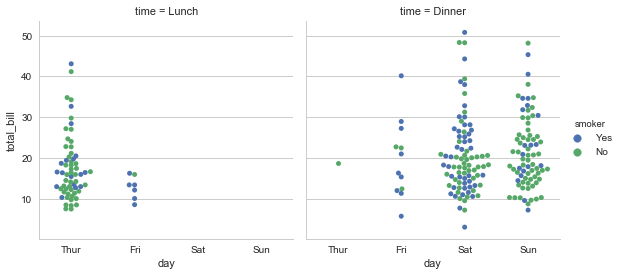

In [18]:
sns.factorplot(x="day", y="total_bill", hue="smoker", #　绘制多列数据
               col="time", data=tips, kind="swarm")
plt.show()